In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_csv("Salary_Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
x=df[['Age']]
x.head()

,Age
0,32.0
1,28.0
2,45.0
3,36.0
4,52.0


In [7]:
y=df.Salary
y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6704, dtype: float64

In [8]:
df.isnull().sum()                                         # to check if the nulll value exist or not 
df.dropna(inplace=True)

In [9]:
df.isnull().sum()      

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
# Features and target
X = df[['Age', 'Years of Experience']]
y = df['Salary']


In [12]:
X

,Age,Years of Experience
0,32.0,5.0
1,28.0,3.0
2,45.0,15.0
3,36.0,7.0
4,52.0,20.0
...,...,...
6699,49.0,20.0
6700,32.0,3.0
6701,30.0,4.0
6702,46.0,14.0


In [13]:
y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6698, dtype: float64

In [18]:
print(len(x))
print(len(y))


6704
6698


In [20]:
df = df.dropna(subset=['Age', 'Years of Experience', 'Salary'])  # remove rows with NaN in required columns

x = df[['Age', 'Years of Experience']]
y = df['Salary']


In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=7)

In [22]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
predictions = model.predict(X)
print(predictions)

[ 89968.27708896  78756.4039208  158303.3489757  ...  84362.34050488
 147436.3955148   64037.18616808]


In [24]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 100519.38459857489
Coefficients: [-1753.67229227  9113.28116863]


In [25]:
ypred = model.predict(xtest)

In [26]:
ypred

array([ 84362.34050488,  86116.01279715, 161465.77385299, ...,
        73150.46733671,  93475.62167351, 117308.12059485], shape=(1340,))

In [28]:
mae = mean_absolute_error(ytest, ypred)
print(f"MAE:{mae:.2f}")


MAE:24388.04


In [29]:


# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE:{mae:.2f}")



RMSE:24388.04


In [30]:
# R-squared (Coefficient of Determination)
r2 = r2_score(ytest, ypred)
print(f"r2_Score:{mae:.2f}")


r2_Score:24388.04


In [31]:
print("True values:", ytest.values)
print("Predicted values:", ypred)


True values: [ 75000.  70000. 195000. ...  35000.  90000.  80000.]
Predicted values: [ 84362.34050488  86116.01279715 161465.77385299 ...  73150.46733671
  93475.62167351 117308.12059485]


In [33]:
error = ytest - ypred

In [34]:
error

6011    -9362.340505
5852   -16116.012797
6185    33534.226147
665     50376.642618
4449    -8318.038145
            ...     
6431   -10076.786638
2349    -3475.621674
4043   -38150.467337
3278    -3475.621674
6571   -37308.120595
Name: Salary, Length: 1340, dtype: float64

In [35]:

# Mean Absolute Error
mae = mean_absolute_error(ytest, ypred)

# Mean Squared Error
mse = mean_squared_error(ytest, ypred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R-squared
r2 = r2_score(ytest, ypred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

MAE: 24388.04
MSE: 943937301.20
RMSE: 30723.56
R-squared: 0.6643


C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


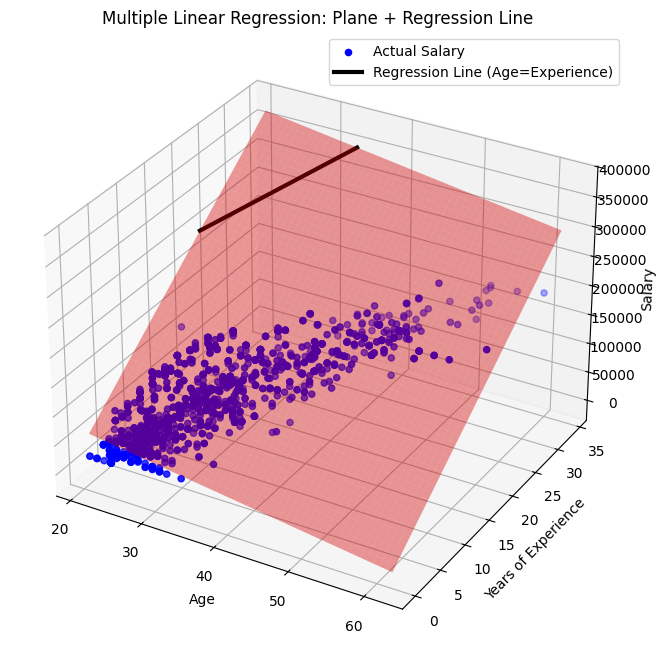

In [40]:
age_range = np.linspace(X['Age'].min(), X['Age'].max(), 50)
exp_range = np.linspace(X['Years of Experience'].min(), X['Years of Experience'].max(), 50)
Age_mesh, Exp_mesh = np.meshgrid(age_range, exp_range)
grid_points = np.c_[Age_mesh.ravel(), Exp_mesh.ravel()]
salary_pred_plane = model.predict(grid_points).reshape(Age_mesh.shape)

# Regression line along Age = Years of Experience (diagonal line in input space)
line_vals = np.linspace(max(X['Age'].min(), X['Years of Experience'].min()), 
                        min(X['Age'].max(), X['Years of Experience'].max()), 100)
line_features = np.column_stack((line_vals, line_vals))  # Age = Years of Experience
salary_pred_line = model.predict(line_features)

# Plotting
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot actual test points
ax.scatter(xtest['Age'], xtest['Years of Experience'], ytest, color='blue', label='Actual Salary')

# Regression plane
ax.plot_surface(Age_mesh, Exp_mesh, salary_pred_plane, color='red', alpha=0.4)

# Regression line on Age=YearsExp diagonal
ax.plot(line_vals, line_vals, salary_pred_line, color='black', linewidth=3, label='Regression Line (Age=Experience)')

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Years of Experience')
ax.set_zlabel('Salary')
ax.set_title('Multiple Linear Regression: Plane + Regression Line')
ax.legend()

plt.show()